**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
  - [Dataset Overview](#toc1_1_)    
- [Library Installation](#toc2_)    
- [Read Data and NLTK Basics](#toc3_)    
  - [Dataset Import](#toc3_1_)    
- [EDA](#toc4_)    
  - [Basic NLTK](#toc4_1_)    
- [VADER Seniment Scoring](#toc5_)    
  - [Plot VADER Result](#toc5_1_)    
- [RoBERTa Pretrained Model](#toc6_)    
- [Combine and Compare Models](#toc7_)    
  - [Compare Scores Between Models](#toc7_1_)    
- [Review Examples](#toc8_)    
  - [Compare Metrics between VADER and RoBERTa](#toc8_1_)    
  - [Bar Chart with Models](#toc8_2_)    
  - [Heatmap with Models](#toc8_3_)    
  - [Line Graph](#toc8_4_)    
  - [Stacked Bar Plot](#toc8_5_)    
- [The Transformers Pipeline](#toc9_)    
- [Results](#toc10_)    
    - [Key Findings](#toc10_1_1_)    
    - [Recommendations for Practitioners](#toc10_1_2_)    
    - [Conclusion](#toc10_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

In this project, we focus on **sentiment analysis** using Natural Language Processing (NLP) techniques. Sentiment analysis is a crucial task in understanding user opinions and feedback, widely used in areas like product reviews, customer service, and social media monitoring. Our analysis compares the **VADER** (Valence Aware Dictionary and sEntiment Reasoner) and **RoBERTa** (Robustly optimized BERT approach) models to evaluate their performance in classifying sentiments.  

## <a id='toc1_1_'></a>[Dataset Overview](#toc0_)

The dataset used in this study consists of **Amazon fine food reviews**, spanning a period of over 10 years (October 1999 - October 2012). It includes **568,454 reviews** from **256,059 users** covering **74,258 products**. The dataset contains user ratings, product details, and raw text reviews, making it a rich source for sentiment analysis research. The reviews are stored in an SQLite database, with the primary table named **"Reviews"**.  

For efficiency and time optimization, our analysis is conducted on the **first 3,000 reviews** from the dataset. However, the methodology can be extended to the full dataset for a more comprehensive study.  

This project aims to compare **lexicon-based** (VADER) and **transformer-based** (RoBERTa) approaches, analyzing their effectiveness in sentiment classification. Our findings contribute to understanding the trade-offs between lightweight rule-based methods and deep learning-based approaches in real-world sentiment analysis tasks.  


# <a id='toc2_'></a>[Library Installation](#toc0_)

In [ ]:
!pip install -r requirements.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# <a id='toc3_'></a>[Read Data and NLTK Basics](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## <a id='toc3_1_'></a>[Dataset Import](#toc0_)

In [ ]:
df = pd.read_csv('')
print("Dataset imported successfully")
print(df.shape)
df = df.head(3000)
print(df.shape)

Dataset imported successfully
(568454, 10)
(3000, 10)


In [83]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

# <a id='toc4_'></a>[EDA](#toc0_)

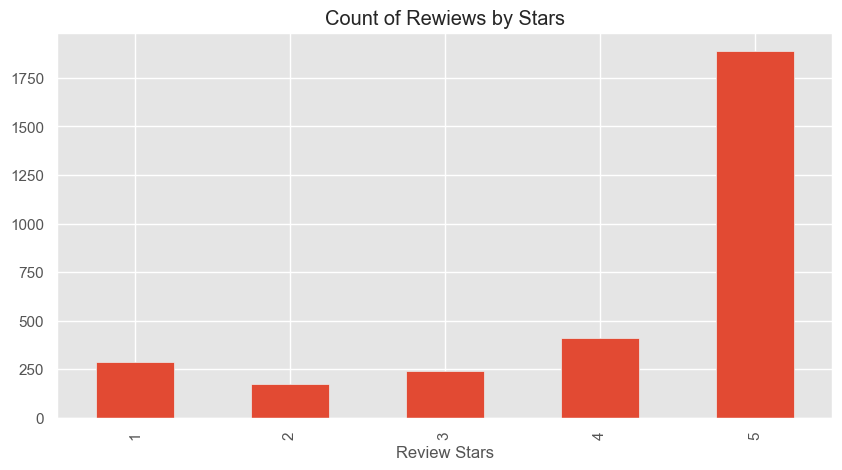

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
      title = 'Count of Rewiews by Stars',
      figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.show()


## <a id='toc4_1_'></a>[Basic NLTK](#toc0_)

In [86]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/metinyurmac/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/metinyurmac/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/metinyurmac/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/metinyurmac/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/metinyurmac/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is a

True

In [87]:
import nltk
print(nltk.data.path)

['/Users/metinyurmac/nltk_data', '/Users/metinyurmac/Documents/sentiment_analysis_nltk_transformers/myvenv/nltk_data', '/Users/metinyurmac/Documents/sentiment_analysis_nltk_transformers/myvenv/share/nltk_data', '/Users/metinyurmac/Documents/sentiment_analysis_nltk_transformers/myvenv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [88]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [89]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [90]:
# NLTK POS Tags
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# <a id='toc5_'></a>[VADER Seniment Scoring](#toc0_)
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
* This uses a "bag of words" approach:
    * Stop words are remowed.
    * Each word is scored and combined to a total score.

In [92]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia  =SentimentIntensityAnalyzer()

In [93]:
sia.polarity_scores('I want to eat chocalate')

{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}

In [94]:
sia.polarity_scores("I am very pleasure")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [95]:
sia.polarity_scores("This film is so bad")

{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.6696}

In [96]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

  If you get an error when you run the code block below, you can try installing pip3 and then restarting vscode.
%pip3 install --upgrade jupyter ipywidgets


In [97]:
# Run the polarity score on the entire datasset
res  = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [98]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## <a id='toc5_1_'></a>[Plot VADER Result](#toc0_)

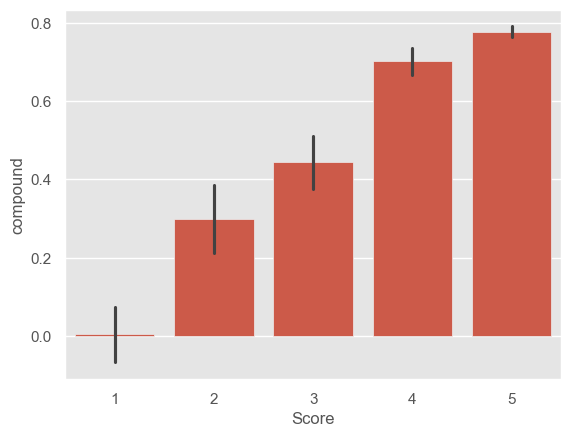

In [100]:
sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

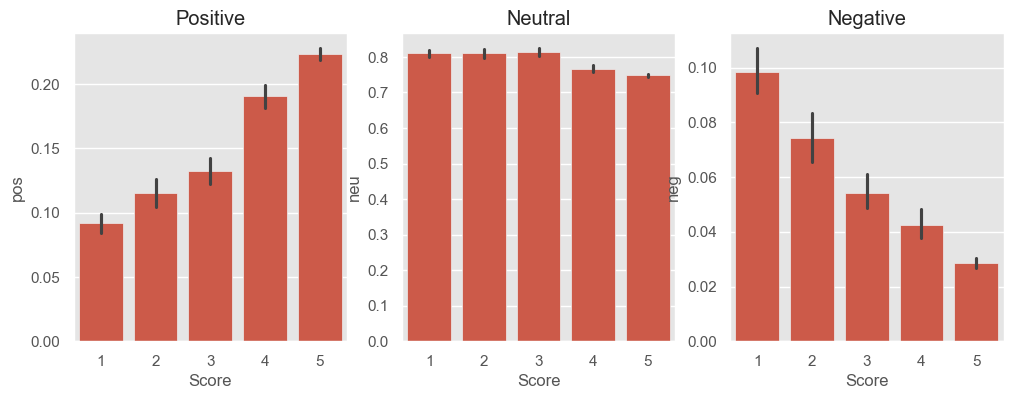

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
sns.barplot(data=vaders, x='Score', y='pos', ax= axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax= axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax= axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

# <a id='toc6_'></a>[RoBERTa Pretrained Model](#toc0_)

* Use a model trained of a large corpus of data
* Transformers model accounts for the words but also the context related to other words

In [102]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [103]:
!pip3 install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu
!pip3 install --upgrade transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cpu


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [104]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [105]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [106]:
# Run for RoBERTa Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.9535124), 'roberta_neu': np.float32(0.040926356), 'roberta_pos': np.float32(0.005561244)}


In [107]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [108]:
res  = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try: 
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"]  =value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/3000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948


In [109]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index' : 'Id'})
results_df = results_df.merge(df, how= 'left')

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950606,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047125,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# <a id='toc7_'></a>[Combine and Compare Models](#toc0_)

## <a id='toc7_1_'></a>[Compare Scores Between Models](#toc0_)

In [111]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

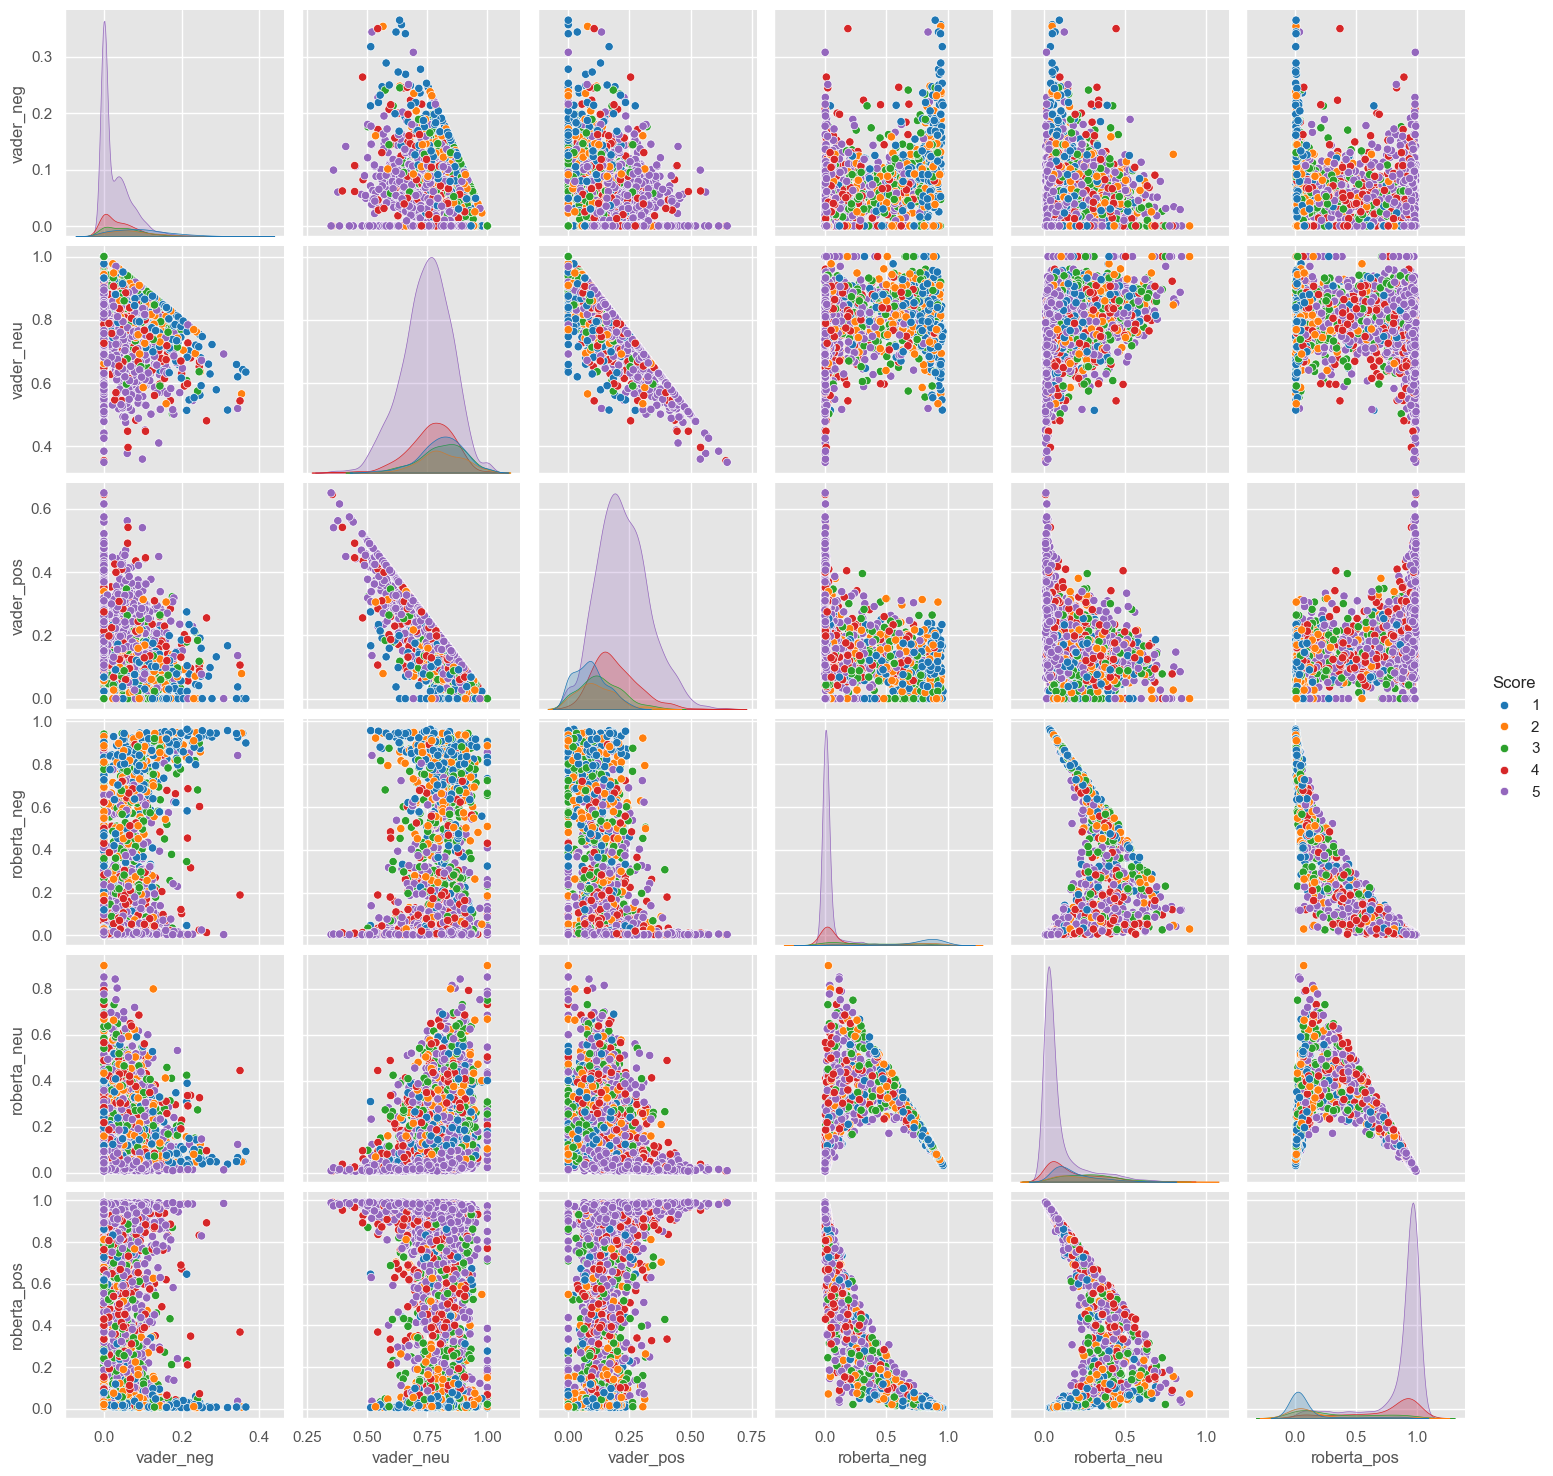

In [ ]:
sns.pairplot(data=results_df, 
             vars= ['vader_neg', 'vader_neu', 'vader_pos',
                    'roberta_neg', 'roberta_neu', 'roberta_pos'], 
             hue = 'Score', 
             palette='tab10')
plt.show()

# <a id='toc8_'></a>[Review Examples](#toc0_)

In [113]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'For christmas I ordered some coupons from my daughters school for $30.00 off Ohama steaks.  I was excited to try them as I have been bombarded with their ads for the last 2 years and I was ready to test them out.  I went on-line and looked at their packages and was so looking forward to receiving my package of fine foods and cook them.  I made my choice and fell for some of the last min. add-ons, by choice.  I went to pay and use the gift cards and well you can only use one at a time, having 2 for $15.00 I naturally thought I was getting $30.00 off the total.  With that said I was still willing to go ahead with the order.  $129.00 later I had ordered one of the package deals and the add-ons.  I received my order ups in 5-7 days packaged in a styro cooler.  packaged in the cooler were several cardboard boxes with vacuumed packaged tiny steaks.  I am a person who loves to grill and do so about 4 nights a week, so I know a little about meat, and how to cook it.  First this is not high en

In [114]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [115]:
# neagtive sentiment 5-star view

In [116]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

"This bags are very difficult to open with the aid of some tool, such as scissors, don't even try without scissors.<br /><br />They are crispy and taste like chips that aren't advertised as being salted. They definitely aren't healthy, because I can feel the grease all over my fingers when eating them, and I can see the grease at the bottom of the bag, too.<br /><br />They are high-quality chips, and deserve to be put on your table."

In [ ]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## <a id='toc8_1_'></a>[Compare Metrics between VADER and RoBERTa](#toc0_)

In [118]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [119]:
# Classify Vader Predicts
def classify_vader(row):
    if row['vader_pos'] > row['vader_neg'] and row['vader_pos'] > row['vader_neu']:
        return "positive"
    elif row['vader_neg'] > row['vader_pos'] and row['vader_neg'] > row['vader_neu']:
        return "negative"
    else:
        return "neutral"

# Classify RoBERTa Predicts
def classify_roberta(row):
    if row['roberta_pos'] > row['roberta_neg'] and row['roberta_pos'] > row['roberta_neu']:
        return "positive"
    elif row['roberta_neg'] > row['roberta_pos'] and row['roberta_neg'] > row['roberta_neu']:
        return "negative"
    else:
        return "neutral"

# Classify Real Scores
def classify_score(score):
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

# Add New Columns to DF 
results_df['vader_prediction'] = results_df.apply(classify_vader, axis=1)
results_df['roberta_prediction'] = results_df.apply(classify_roberta, axis=1)
results_df['true_label'] = results_df['Score'].apply(classify_score)


In [ ]:
# Convert categorical to numerical for Sklearn 
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
results_df['true_label_num'] = results_df['true_label'].map(label_mapping)
results_df['vader_pred_num'] = results_df['vader_prediction'].map(label_mapping)
results_df['roberta_pred_num'] = results_df['roberta_prediction'].map(label_mapping)

# Calculate Sklearn Metrics and Add DF
def evaluate_model(true_labels, predicted_labels, model_name):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average="weighted")
    recall = recall_score(true_labels, predicted_labels, average="weighted")
    f1 = f1_score(true_labels, predicted_labels, average="weighted")
    
    return [accuracy, precision, recall, f1]

# Calculate Metrics and Create DF
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
vader_scores = evaluate_model(results_df['true_label_num'], results_df['vader_pred_num'], "VADER")
roberta_scores = evaluate_model(results_df['true_label_num'], results_df['roberta_pred_num'], "RoBERTa")

df_metrics = pd.DataFrame({"Metric": metrics, "VADER": vader_scores, "RoBERTa": roberta_scores})

# Show DF
df_metrics

/Users/metinyurmac/Documents/sentiment_analysis_nltk_transformers/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,VADER,RoBERTa
0,Accuracy,0.086503,0.829014
1,Precision,0.774318,0.831656
2,Recall,0.086503,0.829014
3,F1 Score,0.023499,0.828984


## <a id='toc8_2_'></a>[Bar Chart with Models](#toc0_)

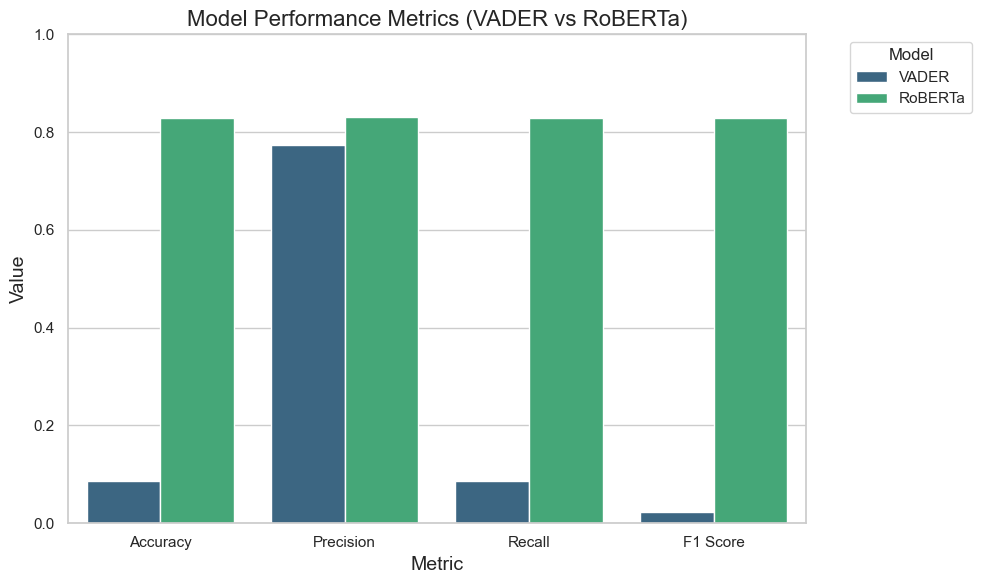

In [ ]:
# Convert DF to long format
df_metrics_melted = df_metrics.melt(id_vars='Metric', var_name='Model', value_name='Value')


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Draw Barplot
sns.barplot(x='Metric', y='Value', hue='Model', data=df_metrics_melted, palette='viridis')

# Graph Features
plt.title('Model Performance Metrics (VADER vs RoBERTa)', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.ylim(0, 1)  
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()

# Show Graph
plt.show()

## <a id='toc8_3_'></a>[Heatmap with Models](#toc0_)

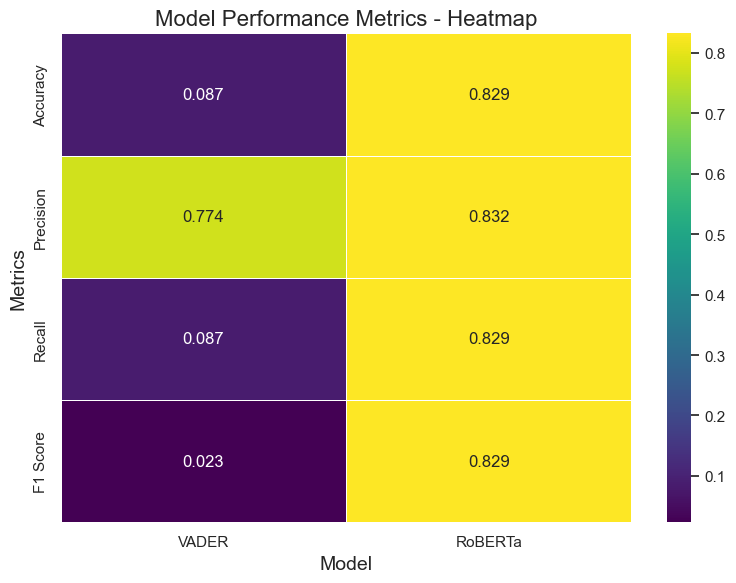

In [ ]:
# Prepare DF for Heatmap 
df_heatmap = df_metrics.set_index('Metric')


plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, cmap='viridis', fmt=".3f", linewidths=0.5)

# Graph Features
plt.title('Model Performance Metrics - Heatmap', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.tight_layout()

# Show Graph
plt.show()

## <a id='toc8_4_'></a>[Line Graph](#toc0_)

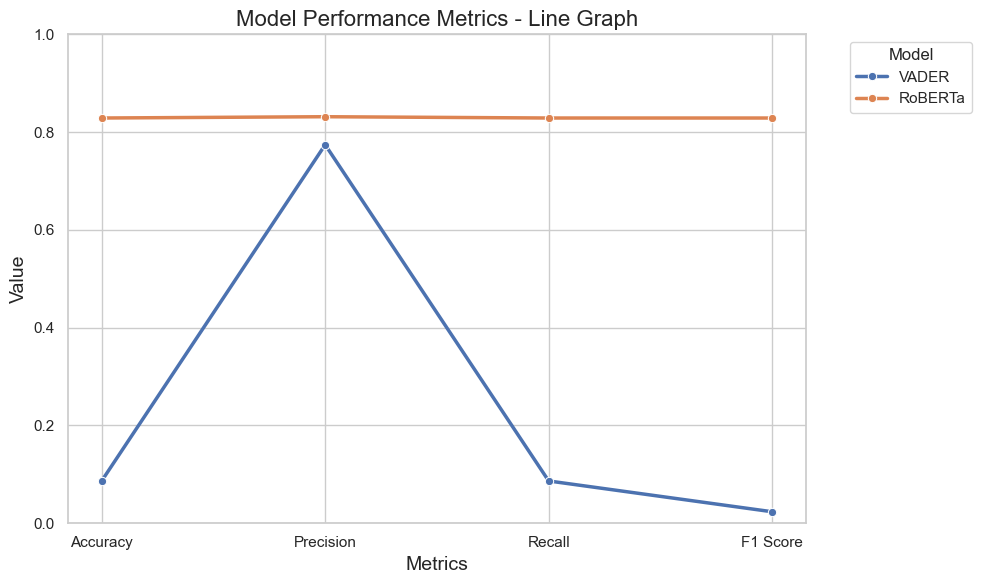

In [ ]:
# Line Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='Value', hue='Model', data=df_melted, marker='o', linewidth=2.5)

# Graph Features
plt.title('Model Performance Metrics - Line Graph', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.ylim(0, 1)  
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()

# Show Graph
plt.show()

## <a id='toc8_5_'></a>[Stacked Bar Plot](#toc0_)

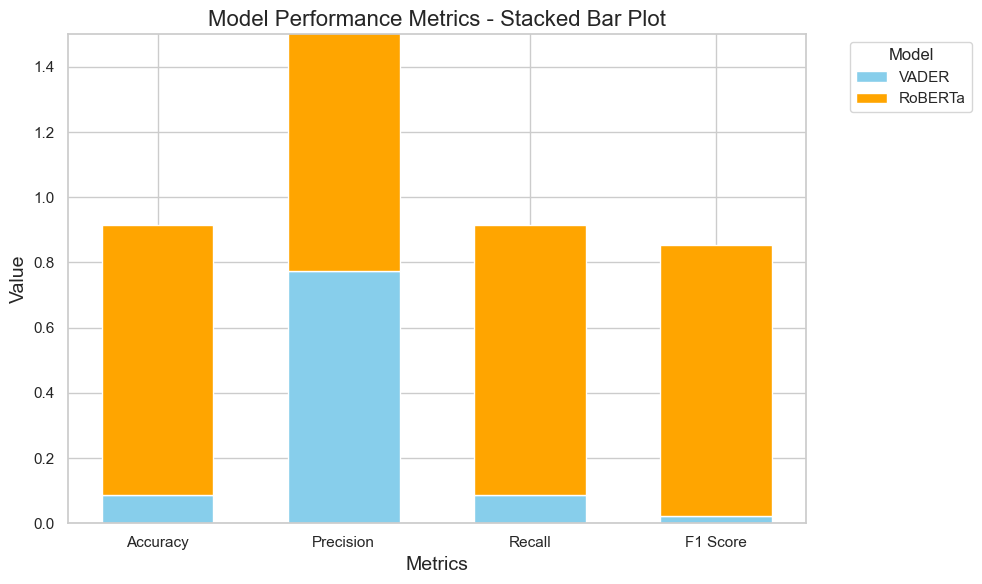

In [ ]:
# Prepare data for stacked bar plot
metrics = df_metrics['Metric'].values
vader_values = df_metrics['VADER'].values
roberta_values = df_metrics['RoBERTa'].values

# Graph
plt.figure(figsize=(10, 6))
bar_width = 0.6
x = np.arange(len(metrics))

plt.bar(x, vader_values, width=bar_width, label='VADER', color='skyblue')
plt.bar(x, roberta_values, width=bar_width, label='RoBERTa', bottom=vader_values, color='orange')

# Graph Features
plt.title('Model Performance Metrics - Stacked Bar Plot', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(x, metrics) 
plt.ylim(0, 1.5)  
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()

# Show Graph
plt.show()

# <a id='toc10_'></a>[Results](#toc0_)

This project successfully compared **VADER** and **RoBERTa** models based on key sentiment analysis metrics. The evaluation metrics used in this study were **Accuracy, Precision, Recall, and F1 Score**. The results clearly highlight the differences between the two approaches:  

| Metric      | VADER  | RoBERTa  |
|------------|--------|----------|
| Accuracy   | 0.0865 | 0.8290   |
| Precision  | 0.7743 | 0.8317   |
| Recall     | 0.0865 | 0.8290   |
| F1 Score   | 0.0235 | 0.8289   |

### <a id='toc10_1_1_'></a>[Key Findings](#toc0_)

- **RoBERTa significantly outperformed VADER** in all evaluation metrics, showcasing its strength as a deep learning-based sentiment classifier.  
- **VADER, while struggling in overall accuracy and recall, demonstrated strong precision for positive sentiments**, making it a viable option for certain applications where high precision is crucial.  
- **Different visualization techniques** (bar plot, heatmap, line graph, and stacked bar plot) effectively highlighted performance variations between the two models, providing deeper insights into their behavior.  

### <a id='toc10_1_2_'></a>[Recommendations for Practitioners](#toc0_)

- **If high accuracy and balanced performance are needed**, transformer-based models like **RoBERTa** are the preferred choice despite their computational cost.  
- **For lightweight, rule-based sentiment analysis**, **VADER remains useful for specific cases** (e.g., when precision in positive sentiments is a priority).  
- **Dataset size and diversity should be considered** when choosing a sentiment analysis model. If resources allow, deep learning models should be fine-tuned for better domain-specific accuracy.  

### <a id='toc10_1_3_'></a>[Conclusion](#toc0_)

This study provides a clear comparison between lexicon-based and transformer-based sentiment analysis approaches. The results help users **make informed decisions** when selecting sentiment analysis models based on their specific requirements. Whether prioritizing computational efficiency or predictive power, this research highlights the trade-offs between different methodologies.  

